In [1]:
'''Import all the necessary packages'''
import glaes as gl
import geokit as gk
import geopandas as gpd
import pandas as pd


In [2]:
# Sources used:
# Source 1: Source 5\aeroway_ply\aeroway_ply_india.shp

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

pak_srs = 24313

In [4]:
#india_outer = gpd.read_file(r"C:\Users\n.pawar\Calculations\Land Eligibility\Input\Source 7\gadm36_IND_shp\gadm36_IND_0.shp")

In [8]:
mainSource_inner = r"C:\Users\lenovo\Desktop\Programming models\Pakistan shape file folder\Administrative\PAK_adm1.shp"
df_mainSource_inner = gpd.read_file(mainSource_inner)
df_mainSource_inner
#mainSource_outer = r"C:\Users\n.pawar\Calculations\Land Eligibility\Input\Source 7\gadm36_IND_shp\gadm36_IND_0.shp"

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,171,PAK,Pakistan,1,Azad Kashmir,Centrally Administered Area,Centrally Administered Area,None,Kashmir,"POLYGON ((74.64930 35.13991, 74.66885 35.12403..."
1,171,PAK,Pakistan,2,Baluchistan,Province,Province,None,Balochistan|BÃ©loutchistanBeluchistan|Baluchis...,"MULTIPOLYGON (((66.60542 24.90264, 66.60542 24..."
2,171,PAK,Pakistan,3,F.A.T.A.,Territory,Territory,None,Federally Administered Tribal Areas,"POLYGON ((71.55066 34.93081, 71.56419 34.91536..."
3,171,PAK,Pakistan,4,F.C.T.,Capital Territory,Capital Territory,None,Islamabad|Federal Capital Territory|Federal Ca...,"POLYGON ((73.14516 33.80333, 73.17208 33.78874..."
4,171,PAK,Pakistan,5,N.W.F.P.,Province,Province,None,North-West Frontier Province,"POLYGON ((73.66302 36.88824, 73.66410 36.88670..."
5,171,PAK,Pakistan,6,Northern Areas,Centrally Administered Area,Centrally Administered Area,None,None,"POLYGON ((74.74200 37.02206, 74.74920 37.02148..."
6,171,PAK,Pakistan,7,Punjab,Province,Province,None,Pendjab|Penjab,"POLYGON ((73.53603 33.66520, 73.53673 33.65730..."
7,171,PAK,Pakistan,8,Sind,Province,Province,None,Sindh,"MULTIPOLYGON (((68.07542 23.70542, 68.07542 23..."


In [9]:
technology = 'solar_pv'
constraint_name = 'inland_water'

In [10]:
# Filter file creation
'''The filter file should contain all the potential features that can fall under the given constraint type.
This file would be used to extract the applicable features from a shape file containing wider range of 
features.'''


allowed = ['allotments', 'bamboo', 'barren', 'basin', 'breeding', 'brownfield', 'faar', 'fixme', 'fo', 'grass',
           'green', 'green_belt', 'greenfield', 'heath', 'lawn', 'meadow', 'Not Reported', 'open space', 'Other Area', 'rei', 'resii', 'scrub', 
           'shrub', 'steps', 'traffic_island', 'village_green', 'vacant', 'water_wellfield' ]

##### Sociopolitical  #####

filter_water = ['Perennial/Permanent']


In [11]:
# Source 1
'''The file 'raw' is a source file which contains more features than those required for a given constraint'''
raw_1 = gpd.read_file(r"C:\Users\lenovo\Desktop\Programming models\Pakistan shape file folder\Inland water\PAK_water_areas_dcw.shp")

In [12]:
raw_1.head()

,ISO,COUNTRY,F_CODE_DES,HYC_DESCRI,NAME,geometry
0,PAK,Pakistan,Inland Water,Perennial/Permanent,SHANDUR LAKE,"POLYGON ((72.23714 35.32878, 72.23094 35.32861..."
1,PAK,Pakistan,Inland Water,Perennial/Permanent,UNK,"POLYGON ((75.59680 34.94414, 75.59389 34.94189..."
2,PAK,Pakistan,Inland Water,Perennial/Permanent,TARBELA RESERVOIR,"POLYGON ((72.79236 34.51050, 72.79728 34.50956..."
3,PAK,Pakistan,Inland Water,Perennial/Permanent,UNK,"POLYGON ((71.41036 33.58786, 71.40928 33.58308..."
4,PAK,Pakistan,Inland Water,Perennial/Permanent,UNK,"POLYGON ((71.84892 33.58467, 71.84856 33.56514..."


In [13]:
# To display all the features contained in the given source file
raw_1.HYC_DESCRI.unique()

array(['Perennial/Permanent', 'Non-Perennial/Intermittent/Fluctuating'],
      dtype=object)

In [14]:
# Filtering the data
'''The file 'processed' would contain only the necessary features extracted from the corresponding 'raw' file.'''

processed_1 = raw_1[raw_1['HYC_DESCRI'].isin(filter_water)]
#road_proximity_trial.head()

In [16]:
processed_1.HYC_DESCRI.unique()

array(['Perennial/Permanent'], dtype=object)

In [17]:
# Give a file name to the shapefile to be produced from the 'processed' DataFrame
demSource_1 = r"C:\Users\lenovo\Desktop\Programming models\Perennial.shp"


# Converting the DataFrame with the required features into a shapefile
processed_1.to_file(demSource_1)

In [22]:
def state_loop_tif_generator(demSource):
    for state_ID in range(len(df_mainSource_inner.index)):
    #for state_ID in range(1):
        rm = gk.RegionMask.load(mainSource_inner, where = state_ID, srs=pak_srs, pixelSize=100) # the states will be a region mask
    
        ec = gl.ExclusionCalculator(rm)  # just make an exclusion calculator 
        print('Processing the state',df_mainSource_inner.iloc[state_ID]['NAME_1'],'...')
        
        ec.excludeVectorType(demSource, buffer=0) # here we are excluding the vector (Boundary)
    
        ec.draw()
        ec.save(technology + "_" + constraint_name + "_" + df_mainSource_inner.iloc[state_ID]['NAME_1'] + ".tif")
        
    return

Processing the state Azad Kashmir ...
Processing the state Baluchistan ...
Processing the state F.A.T.A. ...
Processing the state F.C.T. ...
Processing the state N.W.F.P. ...
Processing the state Northern Areas ...
Processing the state Punjab ...
Processing the state Sind ...


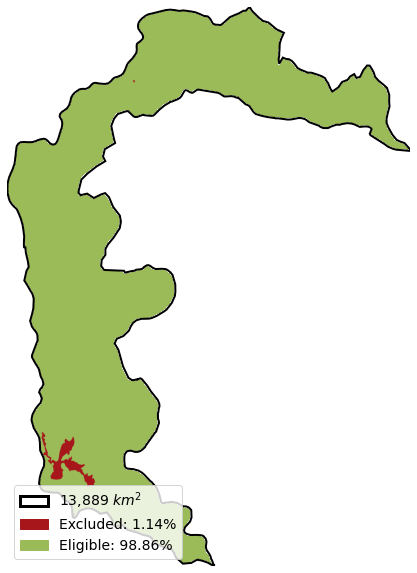

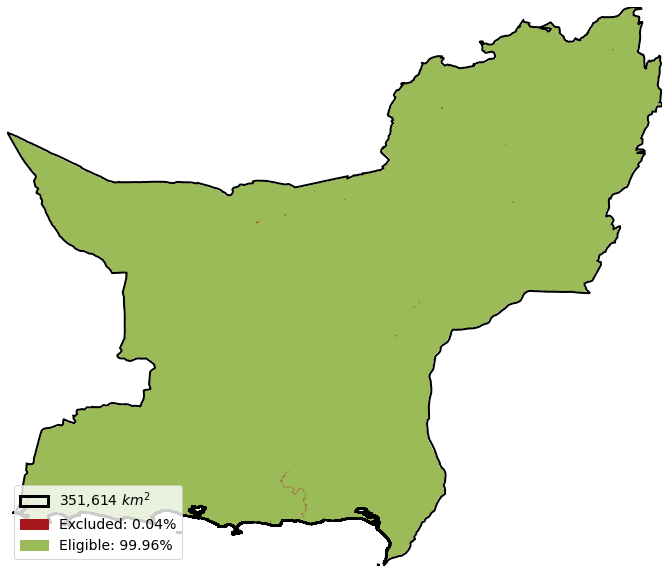

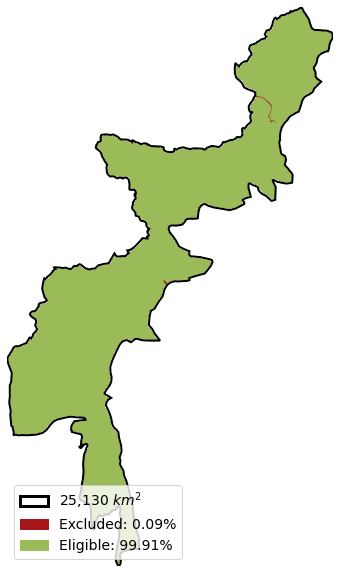

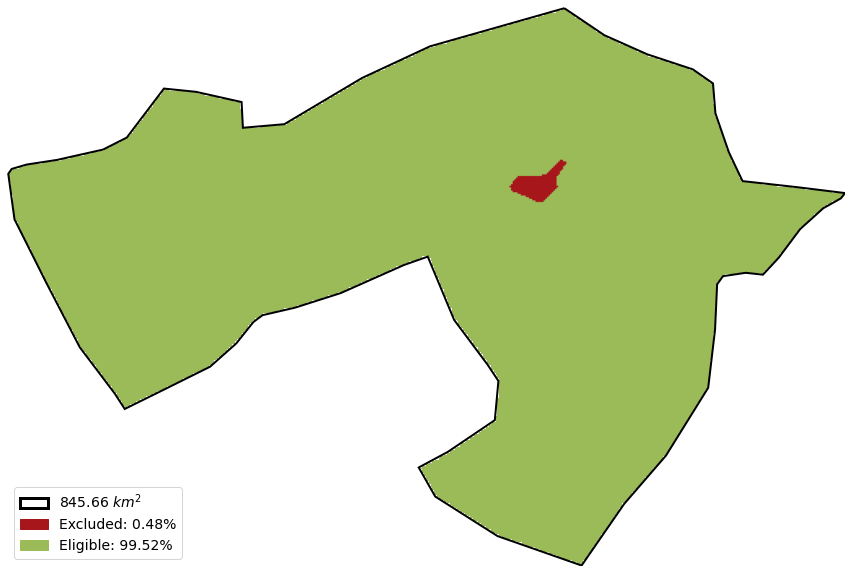

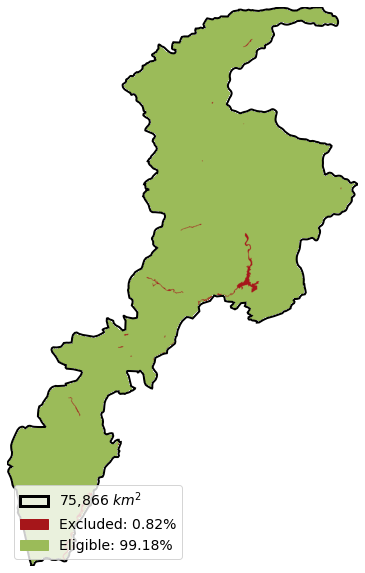

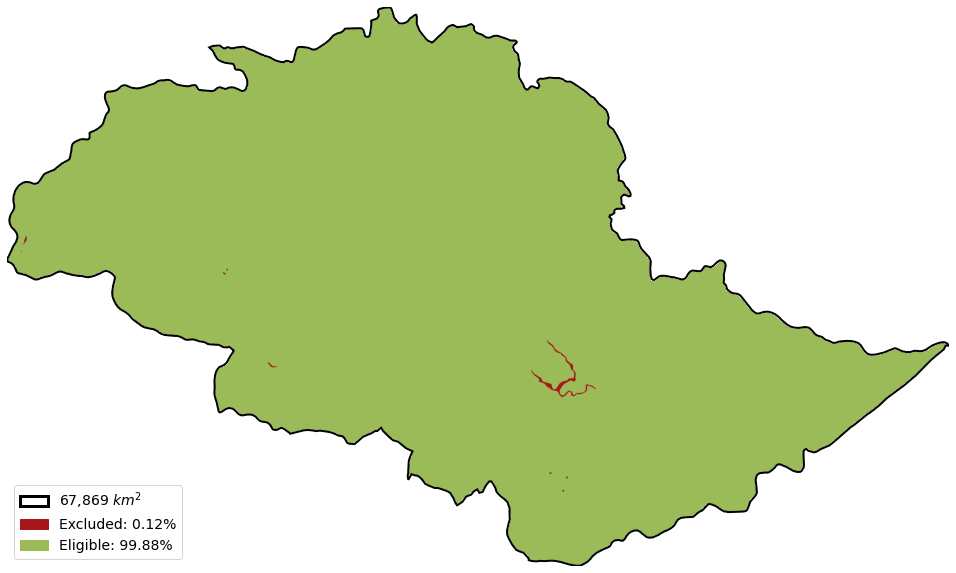

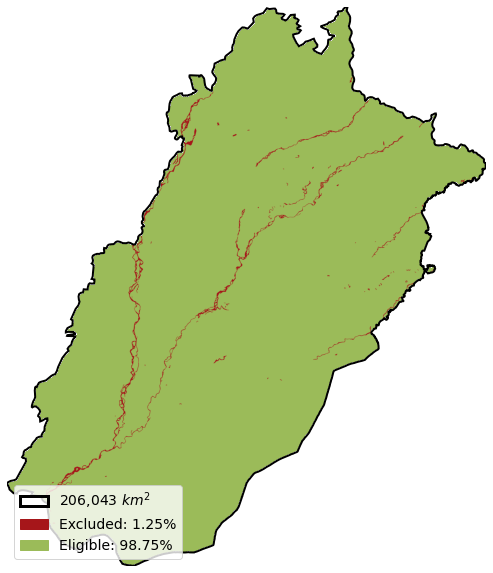

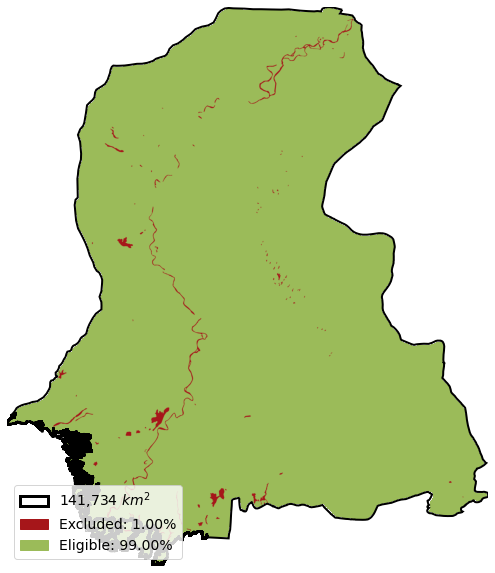

In [23]:
state_loop_tif_generator(demSource=demSource_1)

Processing the rastor file of India...


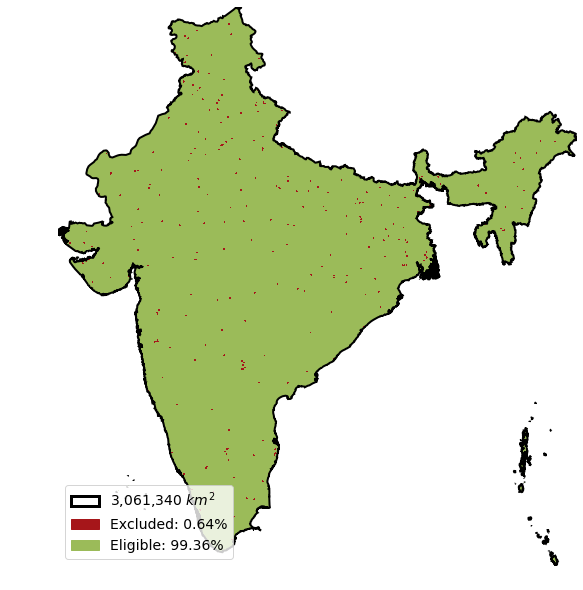

In [7]:
# To show already developed national level rastor files

rm = gk.RegionMask.load(mainSource_outer, srs=india_srs, pixelSize=selected_pixel_size)

ec_country = gl.ExclusionCalculator(rm) 
print('Processing the rastor file of India...')

demSource = r"C:\Users\n.pawar\Calculations\Land Eligibility\onshore_wind\sociopolitical\airport_airfield_proximity\onshore_airport_airfield_proximity_india.tif"
clippedSource = rm.extent.mutateRaster(demSource, output=None)
ec_country.excludeRasterType(clippedSource, value=(100, None), invert=True)
ec_country.draw()

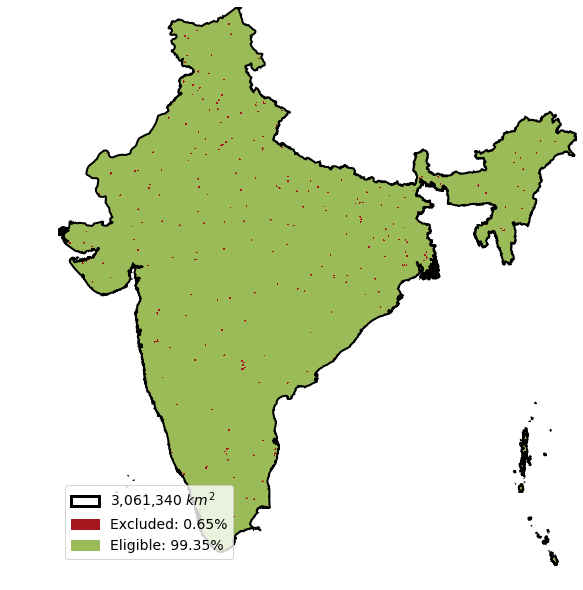

In [19]:
# Source 1
'''To apply the exclusion criterion'''
India.excludeVectorType(r"C:\Users\n.pawar\Calculations\Land Eligibility\onshore_wind\Sociopolitical\airport_airfield_proximity\shapefiles\airport_airfield_proximity_1.shp", buffer = 4000)
India.draw()

In [20]:
India.save("onshore_airport_airfield_proximity_india.tif")

In [ ]:
import os.path

save_path = 'C:\Users\n.pawar\Calculations\Land Eligibility\trial'

name_of_file = raw_input("What is the name of the file: ")

completeName = os.path.join(save_path, name_of_file+".txt")         

file1 = open(completeName, "w")

toFile = raw_input("Write what you want into the field")

file1.write(toFile)

file1.close()

In [40]:
help(gl.ExclusionCalculator)

Help on class ExclusionCalculator in module glaes.core.ExclusionCalculator:

class ExclusionCalculator(builtins.object)
 |  The ExclusionCalculator object makes land eligibility (LE) analyses easy 
 |  and quick. Once initialized to a particular region, the ExclusionCalculator 
 |  object can be used to incorporate any geospatial dataset (so long as it is 
 |  interpretable by GDAL) into the LE analysis. 
 |  
 |  
 |  Note:
 |  ----- 
 |  By default, ExclusionCalculator is always initialized at 100x100 meter 
 |  resolution in the EPSG3035 projection system. This is well-suited to LE 
 |  analyses in Europe, however if another region is being investigated or else 
 |  if another resolution or projection system is desired for any other reason, 
 |  this can be incorporated as well during the initialization stage.
 |  
 |  If you need to find a new projection system for your analyses, the following 
 |  website is helpful: http://spatialreference.org/ref/epsg/
 |  
 |  
 |  Initializati

In [ ]:
plt.savefig(...)

Processing the state Andhra Pradesh ...


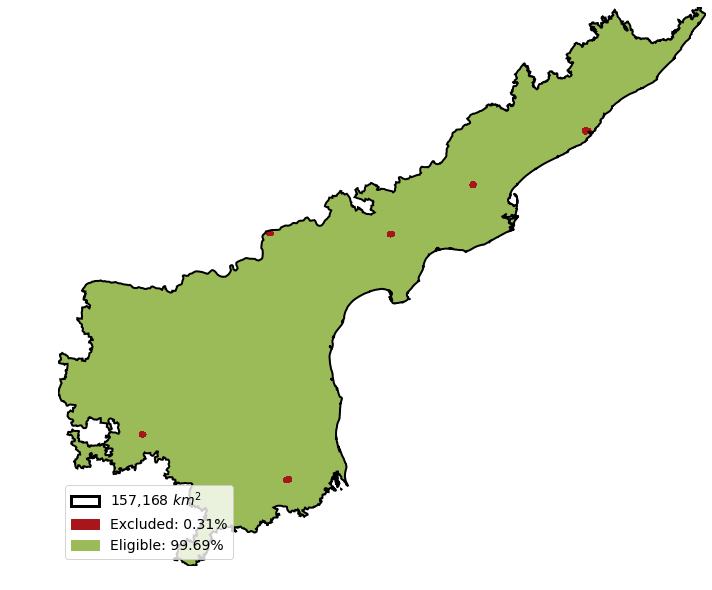

In [97]:


rm = gk.RegionMask.load(mainSource_inner, where = 1, srs=india_srs, pixelSize=selected_pixel_size)
    
ec = gl.ExclusionCalculator(rm) 
print('Processing the state',df_mainSource_inner.iloc[1]['NAME_1'],'...')
        
ec.excludeVectorType(demSource_1, buffer=constraint_buffer) 
    
ec.draw()
technology = 'onshore'
path_constraint_class = r'C:\Users\n.pawar\Calculations\Land Eligibility\trial'
path_constraint = '/xyz'
#final_path = path_constraint_class + path_constraint
ec.save(path_constraint_class  + path_constraint + '.tif')
#ec.save(technology + "_" + constraint_name + "_" + df_mainSource_inner.iloc[1]['NAME_1'] + "_" + demSource_name + ".tif")
        

In [70]:
technology = 'onshore'
x = 'onshore_' + 'abc'
path = r'C:\Users\n.pawar\Calculations\Land Eligibility\trial/' + technology

In [71]:
path

'C:\\Users\\n.pawar\\Calculations\\Land Eligibility\\trial/onshore'

In [61]:
ve

'waa'

In [ ]:
path_constraint_class = 'C:\Users\n.pawar\Calculations\Land Eligibility\onshore_wind\Sociopolitical'
path_constraint = '\settlement_proximity'

In [79]:
path_constraint_class = r'C:\Users\n.pawar\Calculations\Land Eligibility'
path_constraint = '\trail/'
x=path_constraint_class+path_constraint

In [80]:
x

'C:\\Users\\n.pawar\\Calculations\\Land Eligibility\trail/'

In [110]:
constraint_class = 'sociopolitical'
constraint_name = 'airport_airfield_proximity'
constraint_class_list = ['sociopolitical', 'political', 'economic']

In [111]:
for value in constraint_class_list:
    if value == 'sociopolitical':
        print('sociopolitical')
    elif value == 'political':
        print('political')
    else:
        print('economic')

sociopolitical
political
economic
